<a href="https://colab.research.google.com/github/malakkazi/Cognifyz_InternshipTasks/blob/main/L2_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [8]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [11]:
df = pd.read_csv("dataset.csv")

In [12]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong C

In [13]:
print("\nColumn names in dataset:")
print(df.columns)


Column names in dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [14]:
name_col   = 'Restaurant Name'
rating_col = 'Aggregate rating'
votes_col  = 'Votes'

In [16]:
chain_counts = df[name_col].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
print("\nNumber of restaurant chains:", len(restaurant_chains))
print("\nTop 10 restaurant chains by count:")
print(restaurant_chains.head(10))


Number of restaurant chains: 734

Top 10 restaurant chains by count:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [17]:
chains_df = df[df[name_col].isin(restaurant_chains.index)]

avg_chain_ratings = (
    chains_df.groupby(name_col)[rating_col]
    .mean()
    .sort_values(ascending=False)
)

avg_chain_votes = (
    chains_df.groupby(name_col)[votes_col]
    .mean()
    .sort_values(ascending=False)
)

print("\nTop 10 chains by average rating:")
print(avg_chain_ratings.head(10))

print("\nTop 10 chains by average votes (popularity):")
print(avg_chain_votes.head(10))


Top 10 chains by average rating:
Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Garota de Ipanema            4.600
Dishoom                      4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64

Top 10 chains by average votes (popularity):
Restaurant Name
Truffles                     4841.000000
Joey's Pizza                 3903.500000
AB's - Absolute Barbecues    3350.000000
Big Chill                    2713.250000
Big Yellow Door              2503.666667
Out Of The Box               2450.000000
Saravana Bhavan              2412.666667
Olive Bistro                 1854.000000
Talaga Sampireun             1838.000000
SpiceKlub                    1825.500000
Name: Votes, dtype: float64


/tmp/ipython-input-2552418709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.values, y=top_counts.index, palette="mako")


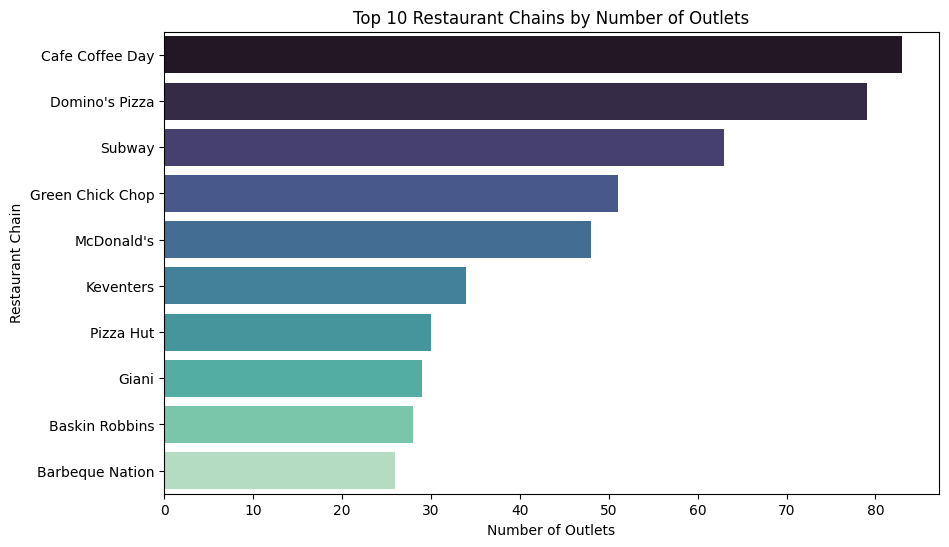

In [18]:
plt.figure(figsize=(10,6))
top_counts = restaurant_chains.head(10)
sns.barplot(x=top_counts.values, y=top_counts.index, palette="mako")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

/tmp/ipython-input-346437760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="viridis")


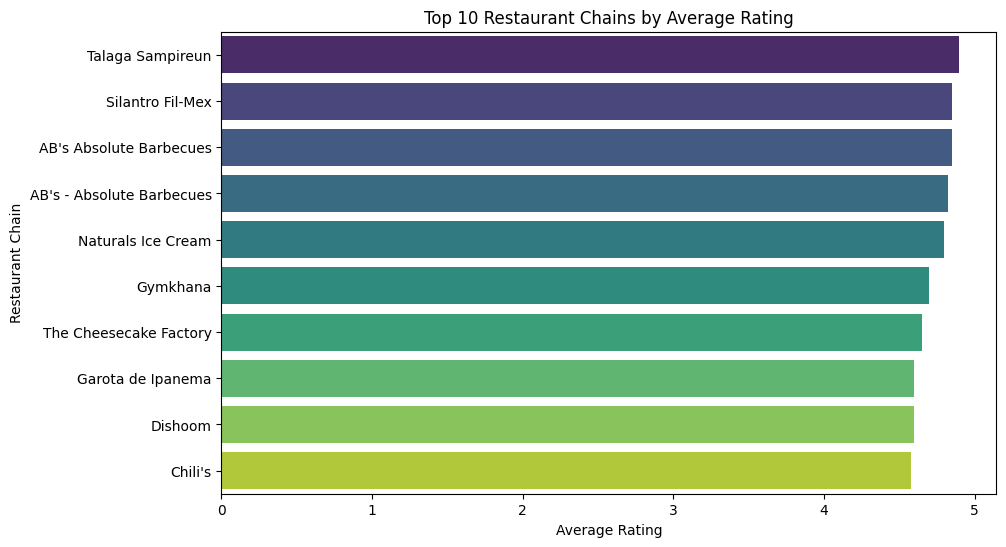

In [19]:
plt.figure(figsize=(10,6))
top_ratings = avg_chain_ratings.head(10)
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="viridis")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

/tmp/ipython-input-4089869884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_votes.values, y=top_votes.index, palette="crest")


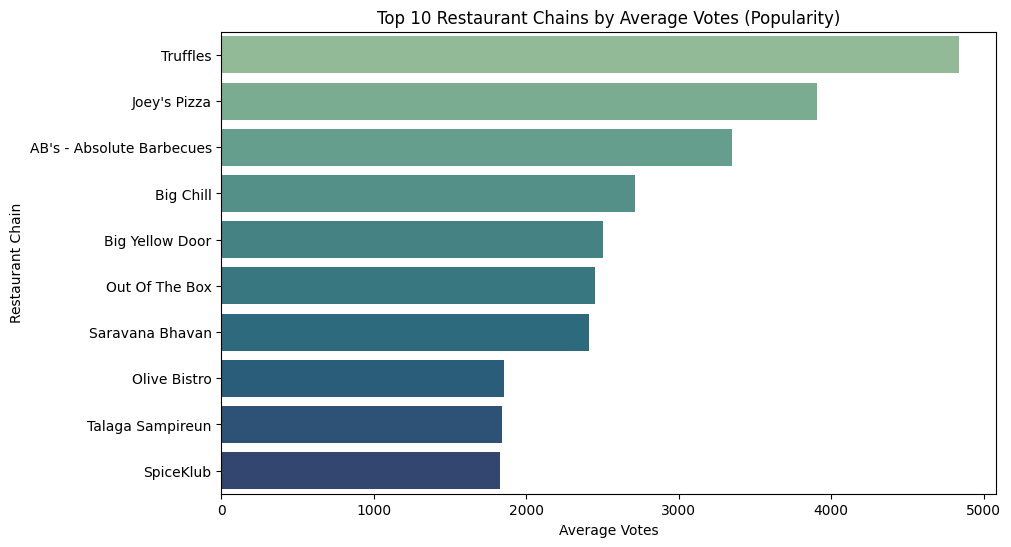

In [20]:
plt.figure(figsize=(10,6))
top_votes = avg_chain_votes.head(10)
sns.barplot(x=top_votes.values, y=top_votes.index, palette="crest")
plt.title("Top 10 Restaurant Chains by Average Votes (Popularity)")
plt.xlabel("Average Votes")
plt.ylabel("Restaurant Chain")
plt.show()